In [111]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
import sympy as sp
import matplotlib.pyplot as plt

from sympy import *
from numpy import linalg as LA
from numpy.linalg import matrix_rank

In [64]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
#Establecer directorio de datos

DIR='/Users/alex/Desktop'
FILE='/adjmatrix.tsv'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))

File directory:/Users/alex/Desktop/adjmatrix.tsv


In [ ]:
#Leer archivo de matriz de adyacencia obtenido con bin/target-adjs | xargs mk

In [3]:
data=pd.read_table(file)
a=np.diag(np.ones(16438),0)
A=data-a

In [61]:
A.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,0.0,0.013031,0.019190,0.016375,0.016943,0.022367,0.013691,0.013233,0.019533,0.018230,...,0.009490,0.013924,0.009659,0.010500,0.018881,0.009490,0.031730,0.018426,0.016263,0.016115
1,NaN,0.000000,0.019359,0.019302,0.015891,0.019269,0.015181,0.040842,0.028730,0.065327,...,0.011890,0.024285,0.013666,0.017896,0.008214,0.011890,0.014344,0.010680,0.023089,0.013776
2,NaN,NaN,0.000000,0.088819,0.013405,0.031995,0.025896,0.016416,0.013057,0.009656,...,0.016378,0.026019,0.018729,0.018735,0.018551,0.016378,0.014103,0.014223,0.019822,0.013575
3,NaN,NaN,NaN,0.000000,0.015439,0.031082,0.009530,0.023720,0.014315,0.028686,...,0.012746,0.016471,0.016116,0.017094,0.018783,0.012746,0.011235,0.017581,0.029332,0.013368
4,NaN,NaN,NaN,NaN,0.000000,0.015012,0.021228,0.026859,0.013298,0.030538,...,0.007838,0.014148,0.017720,0.023233,0.013062,0.007838,0.012461,0.019445,0.013458,0.017010


In [4]:
#Este modulo calcula un valor umbral ("threshold") que promedia todos los valores de las 
# entradas de un data set

# Función convertir a lista el resultado de aplicar .mean() a un DataFrame

def mean_to_list(df):
    arr=[]
    for i in range(0,len(df)):
        a=df.iloc[i]
        arr.append(a)
    return arr

# Función para calcular el promedio de las entradas de una lista 

def cal_prom_en_list(num):
    sum_num=0
    for entrada in num:
        sum_num=sum_num +entrada
        
    prom = sum_num/len(num)
    return prom

# Cálculo del umbral, promediando sobre todas las entradas de la matriz de adyacencia

A_prom_cols=A.mean()
A_mean_list=mean_to_list(A_prom_cols)
cal_prom_en_list(A_mean_list)
threshold=cal_prom_en_list(A_mean_list)

In [15]:
threshold

0.018990814050501657

In [5]:
# Función para dibujar el grafo asociado a la matriz de adyacencia "mat" en formato de 
# DataFrame y a las dimensiones de una submatriz de esta, de nxn donde "n" es el segundo 
# parámetro de la función.

def plt_adj_graph(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    Graph=nx.draw(adj_to_graph)
    
    return Graph

In [6]:
# Función para obtener el polinomio característico de una matriz
# asociada a un data set 

def pol_char(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    data_modx2=sp.Matrix(simm_mat)
    
    lamda=Symbol("lamda")
    pol=data_modx2.charpoly(lamda)


    
    return print(pol),print(pol.coeffs())

In [49]:
#Función para ver qué forma tiene la matriz del data set que estamos
#estudiando 

def mat_shape(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    return simm_mat

In [7]:
#Función para contruir la matriz de grado a partir de la de la matriz de adyacencia

def degreeMat_from_Adj(mat,n):
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans    #type(simm_mat)=numpy matrix
    
    
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx) #obtener la Laplaciana asociada a la de adyacencia
    
    L_arr=L_from_Adj.toarray()
    
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    return deg_Mat

In [48]:
#Función para contruir la matriz Laplaciana "sin signo" a partir de la matriz de adyacencia

def lapMat_WO_sign(mat,n):
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans  #Esta es la matriz de adyacencia completa
                                    #type(simm_mat)=numpy matrix
    
    
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx) #obtener la Laplaciana asociada a la de adyacencia
    
    L_arr=L_from_Adj.toarray()
    
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    L_WO_Sign=deg_Mat+simm_mat
    
    return L_WO_Sign

In [9]:
#Función para contruir la matriz Laplaciana a partir de la matriz de adyacencia
def lapMat(mat,n):
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    Adj_mod=nx.from_numpy_matrix(simm_mat)
    L=nx.laplacian_matrix(Adj_mod)
    L_matrix=L.toarray()
    
    return L_matrix

Para mañana debo revisar el artículo de Terence Tao sobre valores propios y tratar de aplicarlo para crear un script que los calcule de forma eficiente los valores propios

In [53]:
#Función para obtener el polinomio característico de la matriz laplaciana sin signo


def pol_char_from_lap(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx)
    
    L_arr=L_from_Adj.toarray()
    
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    L_WO_Sign=deg_Mat+simm_mat
    
    data_modx2=sp.Matrix(L_WO_Sign)
    
    lamda=symbols("lamda")
    pol=data_modx2.charpoly(lamda)


    
    return print(pol),print(pol.coeffs())

In [75]:
#Función para obtener el polinomio característico de la matriz de adyacencia 


def pol_char_from_adj(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    data_modx2=sp.Matrix(simm_mat)
    
    lamda=symbols("lamda")
    pol=data_modx2.charpoly(lamda)


    
    return print(pol),print(pol.coeffs())

# Relación entre segundo valor propio y número de aristas

Se quiere comprobar la proposición del capítulo 12 de la tesis: El número de aristas de un grafo G con n vértices es igual a - frac{p_1}{2}, donde p_1 es el coeficiente de \lambda^{n-1}  en el polinomio característico de Q(matriz laplaciana sin signo).

Al calcular el polinomio característico del data set de una matriz de 8x8 del total se obtiene que 

In [55]:
pol_char_from_lap(A,8)

PurePoly(1.0*lamda**8 - 28.0*lamda**7 + 325.0*lamda**6 - 2044.0*lamda**5 + 7615.0*lamda**4 - 17188.0*lamda**3 + 22919.0*lamda**2 - 16492.0*lamda + 4908.0, lamda, domain='RR')
[1.00000000000000, -28.0000000000000, 325.000000000000, -2044.00000000000, 7615.00000000000, -17188.0000000000, 22919.0000000000, -16492.0000000000, 4908.00000000000]


(None, None)

Observamos que el segundo coeficiente del polinomio característico es -28 que al usar la fórmula para calcular el número de aristas obtenemos que # aristas= -(-28)/2 = 14

In [11]:
lapMat_WO_sign(A,8)

matrix([[2., 0., 1., 0., 0., 1., 0., 0.],
        [0., 4., 1., 1., 0., 1., 0., 1.],
        [1., 1., 5., 1., 0., 1., 1., 0.],
        [0., 1., 1., 4., 0., 1., 0., 1.],
        [0., 0., 0., 0., 2., 0., 1., 1.],
        [1., 1., 1., 1., 0., 4., 0., 0.],
        [0., 0., 1., 0., 1., 0., 3., 1.],
        [0., 1., 0., 1., 1., 0., 1., 4.]])

In [50]:
mat_shape(A,3)

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [1., 1., 0.]])

Y al dibujar el gráfico vemos que efectivamente el grafo tiene 14 aristas, es decir hay 14 intracciones entre genes.

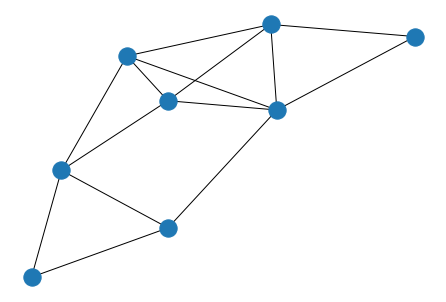

In [57]:
plt_adj_graph(A,8)

In [62]:
degreeMat_from_Adj(A,8)

matrix([[2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 4., 0., 0., 0., 0., 0., 0.],
        [0., 0., 5., 0., 0., 0., 0., 0.],
        [0., 0., 0., 4., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 4., 0., 0.],
        [0., 0., 0., 0., 0., 0., 3., 0.],
        [0., 0., 0., 0., 0., 0., 0., 4.]])

In [65]:
degreeMat_from_Adj(A,80)

matrix([[30.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 44.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 30., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 35.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., 31.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 41.]])

In [66]:
type(degreeMat_from_Adj(A,80))

numpy.matrix

In [167]:
lapMat(A,5)

array([[ 1.,  0., -1.,  0.,  0.],
       [ 0.,  2., -1., -1.,  0.],
       [-1., -1.,  3., -1.,  0.],
       [ 0., -1., -1.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [168]:
LA.eigvals(lapMat(A,5))

array([ 4.00000000e+00,  1.00000000e+00, -1.51136928e-16,  3.00000000e+00,
        0.00000000e+00])

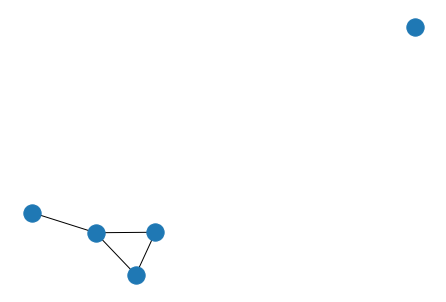

In [204]:
plt_adj_graph(A,5)

In [190]:
A2_M=np.matrix([[0,1,0,0,0,0,0],[1,0,1,1,0,0,0],[0,1,0,1,0,0,0],[0,1,1,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,1],[0,0,0,0,0,1,0]])

In [191]:
A2_gr=nx.from_numpy_matrix(A2_M)

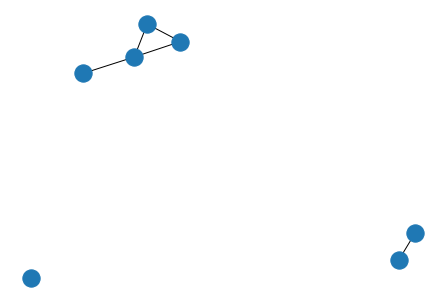

In [207]:
Graph3=nx.draw(A2_gr)

In [208]:
type(A2_gr)

networkx.classes.graph.Graph

In [212]:
print(nx.incidence_matrix(A2_gr).toarray())

[[1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [242]:
A2_M2=np.matrix([[0,1,0,1,0,0],[1,0,1,0,0,0],[0,1,0,1,0,0],[1,0,1,0,0,0],[0,0,0,0,0,1],[0,0,0,0,1,0]])

In [243]:
A2_gr2=nx.from_numpy_matrix(A2_M2)

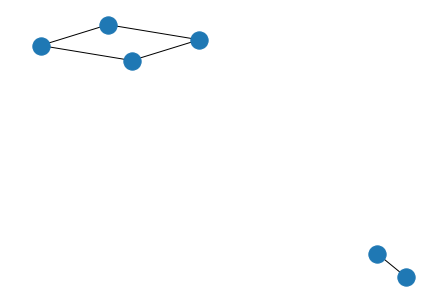

In [246]:
Graph32=nx.draw(A2_gr2)

In [260]:
print(nx.incidence_matrix(A2_gr2,nodelist=None).toarray())

[[1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [254]:
A2_gr2.nodes()

NodeView((0, 1, 2, 3, 4, 5))

In [255]:
A2_gr2.edges()

EdgeView([(0, 1), (0, 3), (1, 2), (2, 3), (4, 5)])

In [199]:
L2=nx.laplacian_matrix(A2_gr)
L2_Array=L2.toarray()
L2_Array

array([[ 1, -1,  0,  0,  0,  0,  0],
       [-1,  3, -1, -1,  0,  0,  0],
       [ 0, -1,  2, -1,  0,  0,  0],
       [ 0, -1, -1,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, -1],
       [ 0,  0,  0,  0,  0, -1,  1]], dtype=int64)

In [201]:
LA.eigvals(L2_Array)

array([ 4.00000000e+00,  1.00000000e+00, -1.51136928e-16,  3.00000000e+00,
        2.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [151]:
mat_shape(A,8)

matrix([[0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0., 1., 0., 1.],
        [1., 1., 0., 1., 0., 1., 1., 0.],
        [0., 1., 1., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 1.],
        [0., 1., 0., 1., 1., 0., 1., 0.]])

In [59]:
pol_char_from_lap(A,80)

PurePoly(1.0*lamda**80 - 2832.0*lamda**79 + 3957527.0*lamda**78 - 3638000424.0*lamda**77 + 2474529176652.0*lamda**76 - 1.32822120316181e+15*lamda**75 + 5.85937504204754e+17*lamda**74 - 2.18471059548297e+20*lamda**73 + 7.02708428798801e+22*lamda**72 - 1.98040620836678e+25*lamda**71 + 4.95043973078766e+27*lamda**70 - 1.10846891391841e+30*lamda**69 + 2.24135244126896e+32*lamda**68 - 4.12040616395588e+34*lamda**67 + 6.92624283666572e+36*lamda**66 - 1.06981565422545e+39*lamda**65 + 1.52478817351673e+41*lamda**64 - 2.01278483025738e+43*lamda**63 + 2.46872484649411e+45*lamda**62 - 2.82143118809806e+47*lamda**61 + 3.01217521091884e+49*lamda**60 - 3.01076023454888e+51*lamda**59 + 2.82308093384093e+53*lamda**58 - 2.48768797851706e+55*lamda**57 + 2.06341821495185e+57*lamda**56 - 1.61331447044932e+59*lamda**55 + 1.19055318478278e+61*lamda**54 - 8.30188183187367e+62*lamda**53 + 5.47583144489353e+64*lamda**52 - 3.41955527382633e+66*lamda**51 + 2.02344708560275e+68*lamda**50 - 1.1353587176143e+70*lam

(None, None)

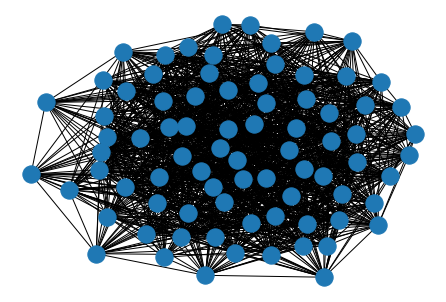

In [58]:
plt_adj_graph(A,80)

Ejemplo 3.2 (curso en portugués)

In [248]:
#creando la matriz de adyacencia 

mat_cic=np.matrix([[0,1,0,1,0,0],[0,1,0,1,0,0],[0,0,0,0,0,1],[1,0,1,0,0,0],[1,0,1,0,0,0],[0,0,0,0,1,0]])


In [249]:
mat_cic_np=nx.from_numpy_matrix(mat_cic)

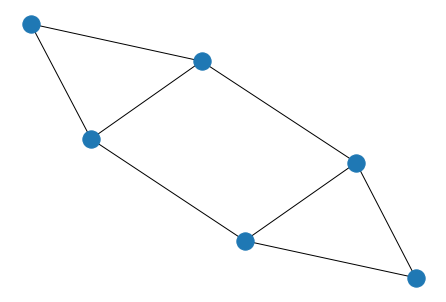

In [250]:
Graph3=nx.draw(mat_cic_np)

In [233]:
print(nx.incidence_matrix(mat_cic_np).toarray())

[[1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [235]:
print(-nx.incidence_matrix(mat_cic_np,oriented=True).toarray())

[[ 1.  1. -0. -0. -0.]
 [-1. -0.  1. -0. -0.]
 [-0. -0. -1.  1. -0.]
 [-0. -1. -0. -1. -0.]
 [-0. -0. -0. -0.  1.]
 [-0. -0. -0. -0. -1.]]


In [230]:
M1=nx.incidence_matrix(mat_cic_np).toarray()

In [231]:
M2=np.array([-1,1,-1,1,0])

In [232]:
print(M1.dot(M2))

[ 0. -2.  0.  2.  0.  0.]


In [ ]:
pol_char_from_lap(A,10)

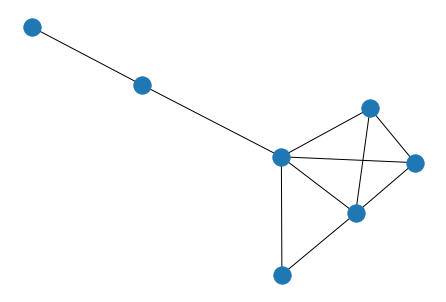

In [108]:
plt_adj_graph(A,7)

NoneType

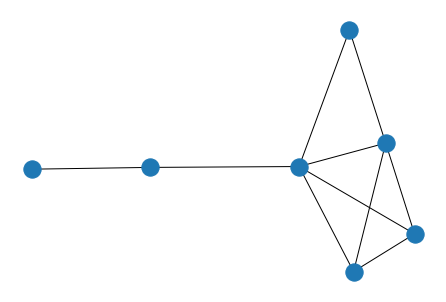

In [116]:
type(plt_adj_graph(A,7))

In [81]:
mat_shape(A,7)

matrix([[0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0., 1., 0.],
        [1., 1., 0., 1., 0., 1., 1.],
        [0., 1., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0.]])

In [82]:
pol_char_from_adj(A,7)

PurePoly(1.0*lamda**7 - 10.0*lamda**5 - 10.0*lamda**4 + 11.0*lamda**3 + 14.0*lamda**2 - 2.0, lamda, domain='RR')
[1.00000000000000, -10.0000000000000, -10.0000000000000, 11.0000000000000, 14.0000000000000, -2.00000000000000]


(None, None)

In [90]:
M7_2=mat_shape(A,7).dot(mat_shape(A,7))

In [91]:
M7_2

matrix([[2., 2., 1., 2., 0., 1., 1.],
        [2., 3., 2., 2., 0., 2., 1.],
        [1., 2., 5., 2., 1., 3., 0.],
        [2., 2., 2., 3., 0., 2., 1.],
        [0., 0., 1., 0., 1., 0., 0.],
        [1., 2., 3., 2., 0., 4., 1.],
        [1., 1., 0., 1., 0., 1., 2.]])

In [194]:
LA.eigvals(M7_2)

array([11.63782977,  3.77801098,  1.9020686 ,  0.12344153,  0.31041363,
        1.24823549,  1.        ])

In [195]:
2+3+5+3+1+4+2

20

In [197]:
LA.eigvals(mat_shape(A,7))

array([ 3.41142635, -1.94371062, -1.37915503, -0.55714777,  0.35134246,
        1.1172446 , -1.        ])

In [198]:
LA.eig(mat_shape(A,7))

(array([ 3.41142635, -1.94371062, -1.37915503, -0.55714777,  0.35134246,
         1.1172446 , -1.        ]),
 matrix([[-2.99077019e-01, -4.11933298e-01,  3.53348236e-01,
           1.47583383e-01,  7.70661760e-01, -1.75646257e-02,
          -1.41701710e-16],
         [-4.23101963e-01, -2.71996548e-01,  2.04829862e-01,
           5.28053623e-02, -4.17425509e-01, -1.67376439e-01,
          -7.07106781e-01],
         [-5.29381271e-01,  6.36171847e-01,  2.39784179e-01,
          -4.68287607e-01,  1.17898259e-01,  1.56048439e-01,
           3.92291473e-17],
         [-4.23101963e-01, -2.71996548e-01,  2.04829862e-01,
           5.28053623e-02, -4.17425509e-01, -1.67376439e-01,
           7.07106781e-01],
         [-4.97640292e-02,  2.29002640e-01,  2.65815904e-01,
           6.79084781e-01, -1.34501305e-01,  6.28630652e-01,
          -4.40453906e-16],
         [-4.90897954e-01,  1.64507279e-01, -7.27106175e-01,
           3.86061856e-01,  1.52867943e-01, -1.75672422e-01,
           5.648561

In [98]:
M7_3=M7_2.dot(mat_shape(A,7))

In [99]:
M7_3

matrix([[ 2.,  4.,  8.,  4.,  1.,  7.,  1.],
        [ 4.,  6., 10.,  7.,  1.,  9.,  2.],
        [ 8., 10.,  8., 10.,  0., 10.,  6.],
        [ 4.,  7., 10.,  6.,  1.,  9.,  2.],
        [ 1.,  1.,  0.,  1.,  0.,  1.,  2.],
        [ 7.,  9., 10.,  9.,  1.,  8.,  3.],
        [ 1.,  2.,  6.,  2.,  2.,  3.,  0.]])

In [196]:
2+6+8+6+0+8+0

30

In [100]:
M7_4=M7_3.dot(mat_shape(A,7))

In [101]:
M7_4

matrix([[15., 19., 18., 19.,  1., 18.,  9.],
        [19., 26., 28., 25.,  2., 27., 11.],
        [18., 28., 44., 28.,  6., 36.,  8.],
        [19., 25., 28., 26.,  2., 27., 11.],
        [ 1.,  2.,  6.,  2.,  2.,  3.,  0.],
        [18., 27., 36., 27.,  3., 35., 11.],
        [ 9., 11.,  8., 11.,  0., 11.,  8.]])

In [92]:
M7_5=M7_4.dot(mat_shape(A,7))

In [93]:
M7_6=M7_5.dot(mat_shape(A,7))

In [94]:
M7_7=M7_6.dot(mat_shape(A,7))

In [95]:
M7_8=M7_7.dot(mat_shape(A,7))

In [96]:
M7_9=M7_8.dot(mat_shape(A,7))

In [97]:
M7_9.dot(mat_shape(A,7))

matrix([[19229., 27102., 33600., 27102.,  3107., 31284., 10977.],
        [27102., 38275., 47684., 38274.,  4448., 44302., 15425.],
        [33600., 47684., 60140., 47684.,  5738., 55554., 18966.],
        [27102., 38274., 47684., 38275.,  4448., 44302., 15425.],
        [ 3107.,  4448.,  5738.,  4448.,   572.,  5239.,  1724.],
        [31284., 44302., 55554., 44302.,  5239., 51479., 17741.],
        [10977., 15425., 18966., 15425.,  1724., 17741.,  6310.]])

In [73]:
LA.eigvals(mat_shape(A,7))

array([ 3.41142635, -1.94371062, -1.37915503, -0.55714777,  0.35134246,
        1.1172446 , -1.        ])

In [72]:
mat_shape(A,7)

matrix([[0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0., 1., 0.],
        [1., 1., 0., 1., 0., 1., 1.],
        [0., 1., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0.]])

7

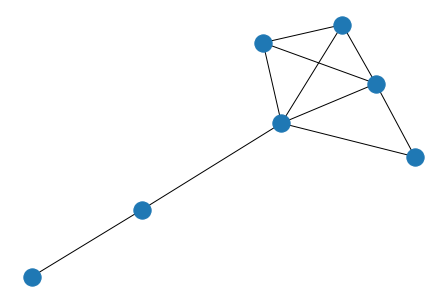

In [127]:
    new_data=A.iloc[:7,:7]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    Graph=nx.draw(adj_to_graph)
    adj_to_graph.number_of_nodes()

In [128]:
adj_to_graph[0][1]

KeyError: 1

In [131]:
type(nx.Graph())

networkx.classes.graph.Graph

In [132]:
type(adj_to_graph)

networkx.classes.graph.Graph

In [133]:
adj_to_graph.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [148]:
adj_to_graph.nodes[6]

{}

In [150]:
type(adj_to_graph.nodes)

networkx.classes.reportviews.NodeView

In [155]:
adj_to_graph.nodes[6]={'v1'}

TypeError: 'NodeView' object does not support item assignment

{0: Text(0.9971991887815647, -0.07988463186028864, '$a$'),
 1: Text(0.46340416198305473, 0.708456815540458, '$b$'),
 2: Text(-0.36983624749882377, 0.8013385047675874, '$c$'),
 3: Text(0.23906278324779054, 0.034621292716310995, '$d$'),
 4: Text(0.3709624652837578, -0.8015861098290774, '$\\alpha$'),
 5: Text(-0.46109272975146043, -0.7087856746810369, '$\\beta$'),
 6: Text(-1.0, 0.07975616070283595, '$\\gamma$'),
 7: Text(-0.23969962204588438, -0.033916357356788364, '$\\delta$')}

(-1.1568324825389518,
 1.134756405753045,
 -0.9427443977507297,
 0.938256595767745)

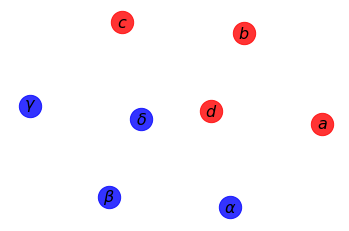

In [164]:
GG=nx.cubical_graph()
pos=nx.spring_layout(GG)
nx.draw_networkx_nodes(GG,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(GG,pos,
                       nodelist=[4,5,6,7],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(GG,pos,labels,font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors.png")
plt.show()

{0: Text(-1.0, 0.2861199304927824, '$a$'),
 1: Text(-0.23670433614820313, 0.9665090724630802, '$b$'),
 2: Text(0.6340199606082222, 0.6237821635475986, '$c$'),
 3: Text(-0.2198822981719682, -0.10665855784744156, '$d$'),
 4: Text(-0.6303213579764799, -0.6227668353010888, '$\\alpha$'),
 5: Text(0.2322814824162799, -0.9645011829117699, '$\\beta$'),
 6: Text(0.9962745003960678, -0.291493577997923, '$\\gamma$'),
 7: Text(0.22433204887608202, 0.10900898755476202, '$\\delta$')}

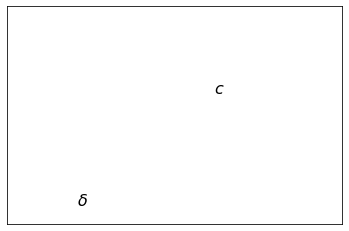

In [ ]:
GG=nx.cubical_graph()
pos=nx.spring_layout(GG)

{0: Text(0.01420101347310097, -0.5409878733320249, '$v_1$'),
 1: Text(0.6318159938544095, -0.11751224744791129, '$v_2$'),
 2: Text(0.062487450740540906, -0.034985331923087296, '$v_3$'),
 3: Text(0.4657023301792239, 0.1386569058154794, '$v_4$'),
 4: Text(-1.0, 0.5626017271959897, '$v_5$'),
 5: Text(0.3556135338725776, -0.30932455053766905, '$v_6$'),
 6: Text(-0.5298203221198527, 0.3015513702292236, '$v_7$')}

(-1.109658049181442,
 0.7497276094790013,
 -0.6523691515413572,
 0.6668219605789608)

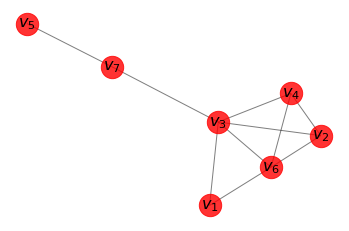

In [193]:
    new_data=A.iloc[:7,:7]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    
    
    pos=nx.spring_layout(adj_to_graph)
    
    nx.draw_networkx_nodes(adj_to_graph,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
    nx.draw_networkx_nodes(adj_to_graph,pos,
                       nodelist=[4,5,6],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
    
    nx.draw_networkx_edges(adj_to_graph,pos,width=1.0,alpha=0.5)
    
labels={}
labels[0]=r'$v_1$'
labels[1]=r'$v_2$'
labels[2]=r'$v_3$'
labels[3]=r'$v_4$'
labels[4]=r'$v_5$'
labels[5]=r'$v_6$'
labels[6]=r'$v_7$'

nx.draw_networkx_labels(adj_to_graph,pos,labels,font_size=16)

plt.axis('off')
plt.savefig("labels_and_colors1.png")
plt.show()

In [199]:
LA.eig([[0,1,0,1,1],[1,0,1,0,1],[0,1,0,0,0],[1,0,0,0,1],[1,1,0,1,0]])

(array([ 2.64118648,  0.72374212, -1.77571286, -1.        , -0.58921574]),
 array([[ 5.37076963e-01,  1.65485890e-01,  3.82027285e-01,
         -7.07106781e-01,  1.95494013e-01],
        [ 4.74749739e-01, -5.03023010e-01, -6.30117572e-01,
         -3.81316250e-16,  3.52891460e-01],
        [ 1.79748663e-01, -6.95030722e-01,  3.54853303e-01,
          1.08628813e-16, -5.98917229e-01],
        [ 4.06693710e-01,  4.57306229e-01, -4.30280474e-01,
         -2.20937958e-16, -6.63573622e-01],
        [ 5.37076963e-01,  1.65485890e-01,  3.82027285e-01,
          7.07106781e-01,  1.95494013e-01]]))

In [201]:
LA.eig([[0,1,-1],[1,1,0],[-1,0,1]])

(array([-1.,  2.,  1.]),
 array([[-8.16496581e-01,  5.77350269e-01,  1.57009246e-16],
        [ 4.08248290e-01,  5.77350269e-01,  7.07106781e-01],
        [-4.08248290e-01, -5.77350269e-01,  7.07106781e-01]]))